<a href="https://colab.research.google.com/github/anjithsm/DataScience/blob/main/Daily_task_Missing_value_Outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/churn-data-v2.csv')

In [3]:
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,five,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,two,159.0,3+,no,yes,no,sales,low


In [4]:
df.isna().sum()

,0
satisfaction,9
evaluation,63
number_of_projects,44
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


In [5]:
df = df.drop(columns=['number_of_projects','department'])

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
df.shape

(14999, 8)

In [8]:
null_colums = df[['satisfaction','evaluation','average_montly_hours']]

In [9]:
iputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [10]:
iputer=iputer.fit(null_colums)
null_colums=iputer.transform(null_colums)

In [11]:
null_colums = pd.DataFrame(null_colums, columns=['satisfaction','evaluation','average_montly_hours'])
null_colums.isna().sum()

,0
satisfaction,0
evaluation,0
average_montly_hours,0


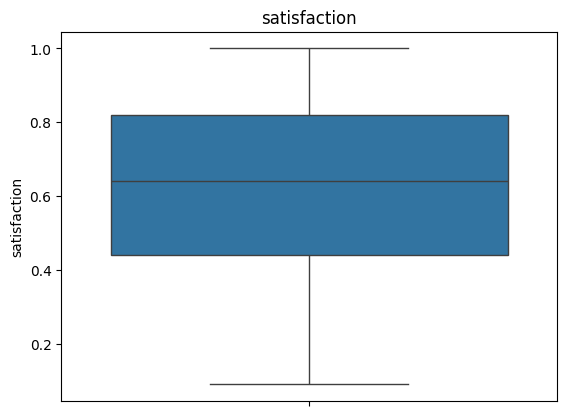

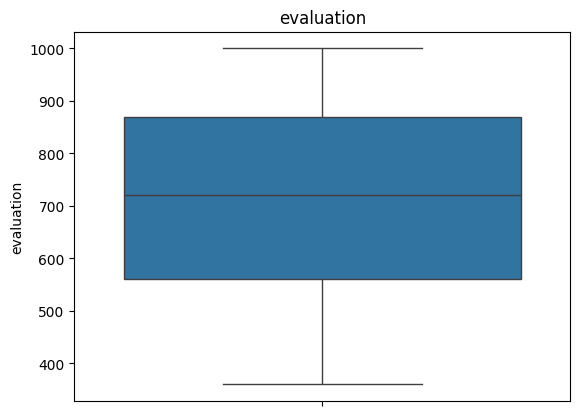

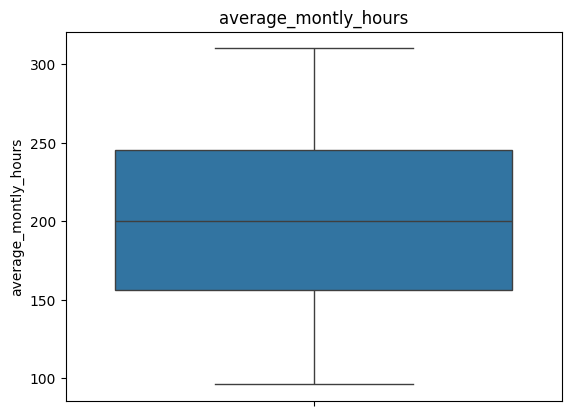

In [12]:
from matplotlib.pyplot import boxplot
import matplotlib.pyplot as plt
IS=[ 'satisfaction','evaluation','average_montly_hours']
import seaborn as sns
for col in IS:
  plt.figure()
  sns.boxplot(data=df[col])
  plt.title(col)
  plt.show()

0.44
0.64
0.82
0.37999999999999995
-0.12999999999999995
1.39


<Axes: >

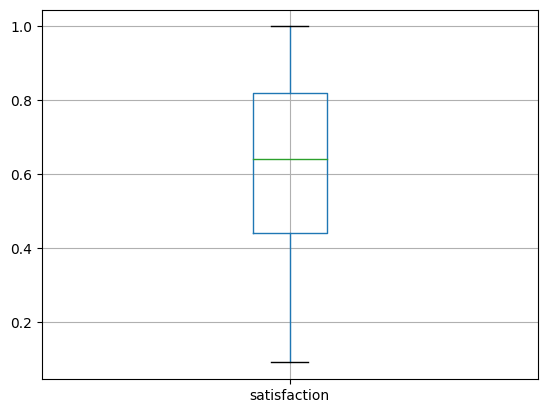

In [13]:
Q1 = df['satisfaction'].quantile(0.25)
Q2 = df['satisfaction'].quantile(0.50)
Q3 = df['satisfaction'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q2)
print(Q3)
print(IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
df['satisfaction']=df['satisfaction'].clip(lower_bound,upper_bound)
df.boxplot('satisfaction')

In [14]:
outliers=[]
for row in df['satisfaction']:
  if (row<lower_bound) or  (row>upper_bound):
    outliers.append(row)
print(outliers)



[]
